# Implement the multivariate ARIMA forecasting technique in the given data

In [20]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.var_model import VAR
from math import sqrt
from sklearn.metrics import mean_squared_error
from ucimlrepo import fetch_ucirepo

# Fetch and Prepare the Data
Fetch the air quality dataset from UCI ML repository and prepare it by changing the data type of the Date_Time column to datetime and setting it as the index.

In [6]:
# Fetch the dataset
air_quality = fetch_ucirepo(id=360)

# Extract features and targets
X = air_quality.data.features
y = air_quality.data.targets

# Combine features and targets into a single DataFrame
df = pd.concat([X, y], axis=1)

# Combine 'Date' and 'Time' columns into a single 'Date_Time' column
df['Date_Time'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

# Drop the original 'Date' and 'Time' columns
df.drop(['Date', 'Time'], axis=1, inplace=True)

# Set 'Date_Time' as the index
df.set_index('Date_Time', inplace=True)

# Replace -200 (missing values) with the previous value in each column
for column in df.columns:
    df[column] = df[column].replace(-200, np.nan).fillna(method='ffill')

/tmp/ipykernel_15016/2021848674.py:22: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[column] = df[column].replace(-200, np.nan).fillna(method='ffill')


# Deal with Missing Values
Handle missing values in the data. Replace the value -200 with the previous value in the data.

In [7]:
# Your code for the "Deal with Missing Values" section
for column in df.columns:
    df[column] = df[column].replace(-200, np.nan).fillna(method='ffill')

/tmp/ipykernel_15016/2561758308.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[column] = df[column].replace(-200, np.nan).fillna(method='ffill')


# Check Stationarity
Use the Johansen test to check for stationarity in the data.

In [8]:
# Import the necessary function for the Johansen test
from statsmodels.tsa.vector_ar.vecm import coint_johansen

# Drop the 'CO(GT)' column for the Johansen test (it only works with up to 12 variables)
df_johan_test = df.drop(['CO(GT)'], axis=1)

# Apply the Johansen test to check for stationarity
johan_test_result = coint_johansen(df_johan_test, -1, 1)

# Print the eigenvalues from the Johansen test
print(johan_test_result.eig)

[1.75510896e-01 1.52389933e-01 1.15120416e-01 1.04126281e-01
 9.29485509e-02 6.89397159e-02 5.77070988e-02 3.43554214e-02
 3.05980659e-02 1.18697142e-02 2.46766099e-03 7.09584856e-05]


# Create the Validation Set
Split the data into a training set and a validation set.

In [9]:
# Split the data into a training set and a validation set
train = df[:int(0.8*(len(df)))]
valid = df[int(0.8*(len(df))):]

# Fit the Model and Make Predictions
Fit the VAR model on the training data and make predictions on the validation set.

In [11]:
# Fit the VAR model on the training data
model = VAR(endog=train)
model_fit = model.fit()

# Make predictions on the validation set
prediction = model_fit.forecast(model_fit.endog, steps=len(valid))

# Convert the predictions to a DataFrame
pred = pd.DataFrame(index=range(0,len(prediction)), columns=[df.columns])
for j in range(0,13):
    for i in range(0, len(prediction)):
        pred.iloc[i][j] = prediction[i][j]

# Calculate and print the RMSE for each variable
for i in df.columns:
    print('rmse value for', i, 'is : ', sqrt(mean_squared_error(pred[i], valid[i])))

/home/codespace/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_15016/1155931856.py:12: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

rmse value for CO(GT) is :  1.408688883687264
rmse value for PT08.S1(CO) is :  205.8955828402142
rmse value for NMHC(GT) is :  6.673548711338459
rmse value for C6H6(GT) is :  7.1300872487061735
rmse value for PT08.S2(NMHC) is :  277.8484437680232
rmse value for NOx(GT) is :  214.7832234091289
rmse value for PT08.S3(NOx) is :  244.95769661934858
rmse value for NO2(GT) is :  66.69695211710682
rmse value for PT08.S4(NO2) is :  490.0838893412018
rmse value for PT08.S5(O3) is :  446.51541648881613
rmse value for T is :  10.72132579560943
rmse value for RH is :  17.111676248172948
rmse value for AH is :  0.5216247245188741


# Make Predictions Presentable
Transform the predictions into a more presentable format by converting them into a dataframe.

In [12]:
# Convert the predictions to a DataFrame
pred = pd.DataFrame(index=range(0,len(prediction)), columns=[df.columns])
for j in range(0,13):
    for i in range(0, len(prediction)):
        pred.iloc[i][j] = prediction[i][j]

# Calculate and print the RMSE for each variable
for i in df.columns:
    print('rmse value for', i, 'is : ', sqrt(mean_squared_error(pred[i], valid[i])))

/tmp/ipykernel_15016/2955449889.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  pred.iloc[i][j] = prediction[i][j]
/tmp/ipykernel_15016/2955449889.py:5: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a fut

rmse value for CO(GT) is :  1.408688883687264
rmse value for PT08.S1(CO) is :  205.8955828402142
rmse value for NMHC(GT) is :  6.673548711338459
rmse value for C6H6(GT) is :  7.1300872487061735
rmse value for PT08.S2(NMHC) is :  277.8484437680232
rmse value for NOx(GT) is :  214.7832234091289
rmse value for PT08.S3(NOx) is :  244.95769661934858
rmse value for NO2(GT) is :  66.69695211710682
rmse value for PT08.S4(NO2) is :  490.0838893412018
rmse value for PT08.S5(O3) is :  446.51541648881613
rmse value for T is :  10.72132579560943
rmse value for RH is :  17.111676248172948
rmse value for AH is :  0.5216247245188741


# Check RMSE
Calculate the root mean square error (RMSE) for the predictions.

In [13]:
# Calculate and print the RMSE for each variable
for i in df.columns:
    print('rmse value for', i, 'is : ', sqrt(mean_squared_error(pred[i], valid[i])))

rmse value for CO(GT) is :  1.408688883687264
rmse value for PT08.S1(CO) is :  205.8955828402142
rmse value for NMHC(GT) is :  6.673548711338459
rmse value for C6H6(GT) is :  7.1300872487061735
rmse value for PT08.S2(NMHC) is :  277.8484437680232
rmse value for NOx(GT) is :  214.7832234091289
rmse value for PT08.S3(NOx) is :  244.95769661934858
rmse value for NO2(GT) is :  66.69695211710682
rmse value for PT08.S4(NO2) is :  490.0838893412018
rmse value for PT08.S5(O3) is :  446.51541648881613
rmse value for T is :  10.72132579560943
rmse value for RH is :  17.111676248172948
rmse value for AH is :  0.5216247245188741


# Make Final Predictions
Fit the VAR model on the complete dataset and make final predictions.

In [15]:
# Fit the VAR model on the complete dataset
model = VAR(endog=df)
model_fit = model.fit()

# Make final predictions
yhat = model_fit.forecast(model_fit.endog, steps=1)

# Print the final predictions
print(yhat)

[[2.34596328e+00 1.08633212e+03 2.80762173e+02 1.24130779e+01
  1.05535947e+03 2.80882233e+02 6.59534851e+02 1.68444418e+02
  1.15918056e+03 8.50845529e+02 2.73639014e+01 1.55311062e+01
  5.15317053e-01]]


/home/codespace/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


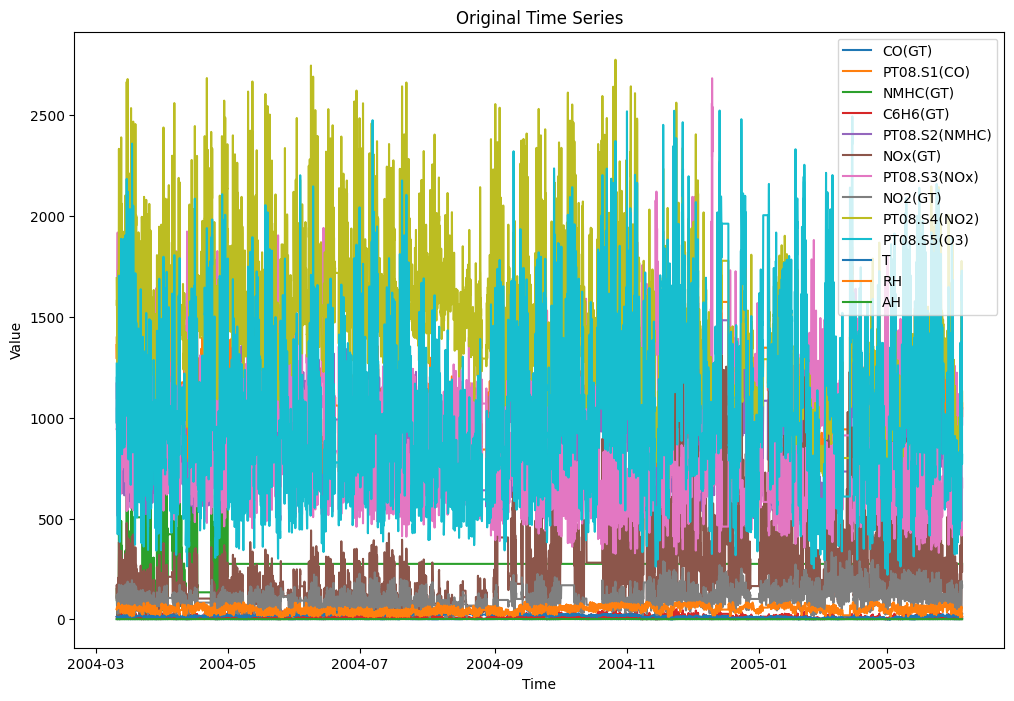

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
for column in df.columns:
    plt.plot(df.index, df[column], label=column)
plt.title('Original Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [26]:
print(df.columns)

Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')


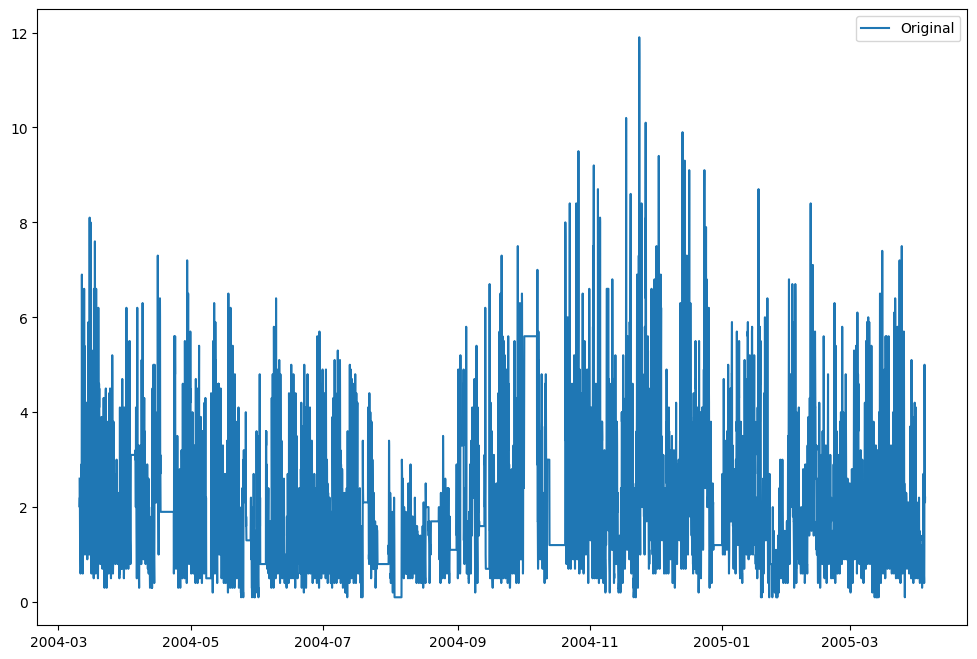

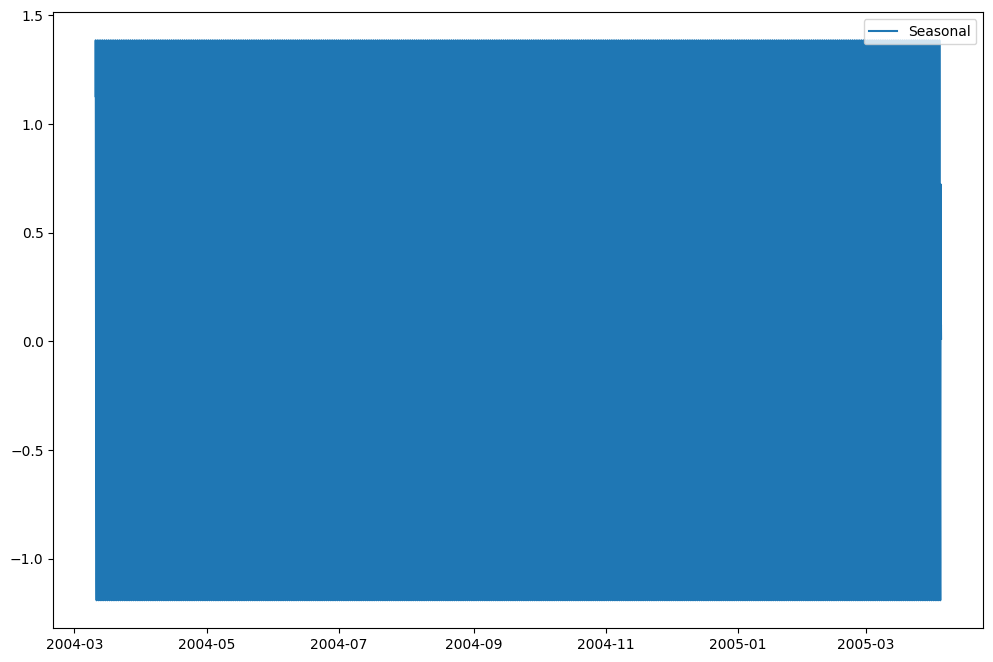

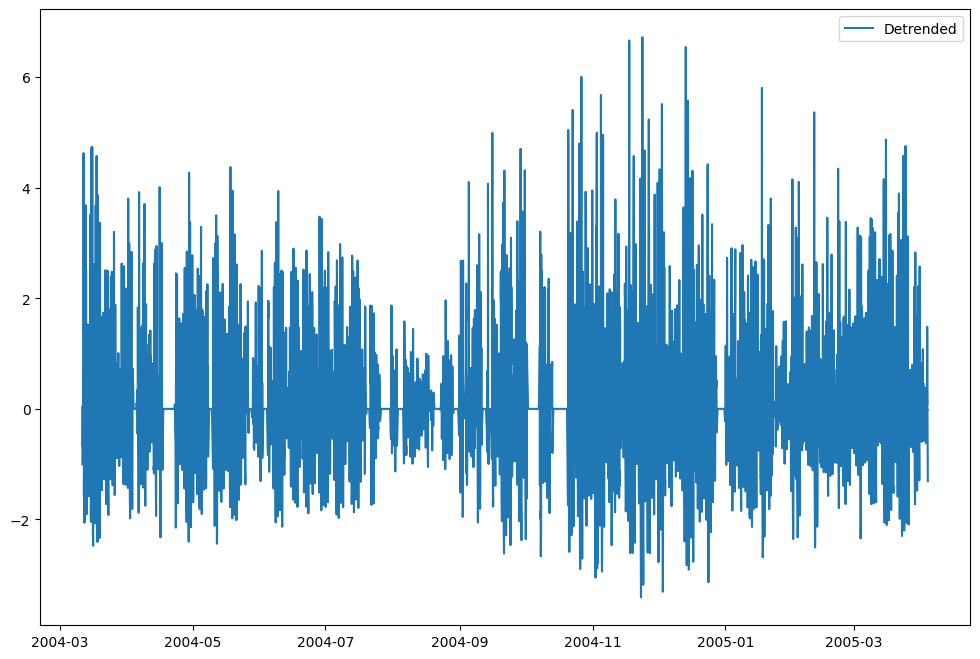

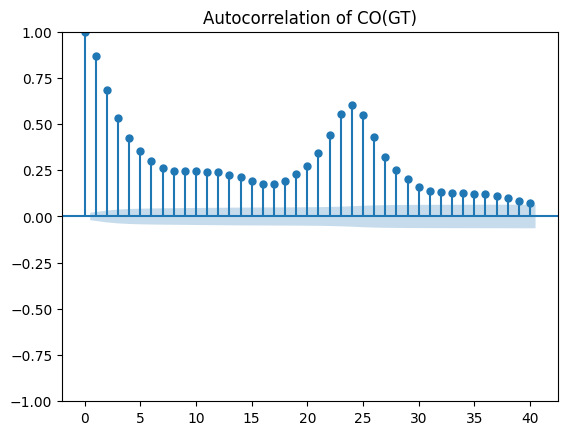

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

# Choose a column to analyze
column_to_analyze = 'CO(GT)'

# Decompose the time series data
decomposition = seasonal_decompose(df[column_to_analyze])

# Plot the original time series
plt.figure(figsize=(12, 8))
plt.plot(df.index, df[column_to_analyze], label='Original')
plt.legend(loc='best')
plt.show()

# Plot the seasonal component
plt.figure(figsize=(12, 8))
plt.plot(df.index, decomposition.seasonal, label='Seasonal')
plt.legend(loc='best')
plt.show()

# Plot the detrended series
detrended = df[column_to_analyze] - decomposition.trend
plt.figure(figsize=(12, 8))
plt.plot(df.index, detrended, label='Detrended')
plt.legend(loc='best')
plt.show()

# Plot the autocorrelation of the column
plot_acf(df[column_to_analyze])
plt.title('Autocorrelation of ' + column_to_analyze)
plt.show()